In [1]:
import numpy as np
import matplotlib.pyplot as plt
import toml
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
data_dir = ''
gauss_spike_train = np.load(os.path.join(data_dir, 'spike_train_gauss_1.npy'))
gauss_stimulus = np.load(os.path.join(data_dir, 'stimulus_gauss_1.npy'))
gauss_filter = np.load(os.path.join(data_dir, f'filter_gauss_1.npy'))
gauss_stimulus = gauss_stimulus.transpose((1,2,0))

gabor_spike_train = np.load(os.path.join(data_dir, 'spike_train_gabor_1.npy'))
gabor_stimulus = np.load(os.path.join(data_dir, 'stimulus_gabor_1.npy'))
gabor_filter = np.load(os.path.join(data_dir, f'filter_gabor_1.npy'))
gabor_stimulus = gabor_stimulus.transpose((1,2,0))

ricker_spike_train = np.load(os.path.join(data_dir, 'spike_train_ricker_1.npy'))
ricker_stimulus = np.load(os.path.join(data_dir, 'stimulus_ricker_1.npy'))
ricker_filter = np.load(os.path.join(data_dir, f'filter_ricker_1.npy'))
ricker_stimulus = ricker_stimulus.transpose((1,2,0))


In [3]:
def analyze_stimulus_covariance(stimulus, title = ""):
    height, width, time = stimulus.shape
    reshaped_stim = stimulus.reshape(height * width, time).T
    
    cov_matrix = np.cov(reshaped_stim, rowvar=False)
    cov_spatial = cov_matrix.reshape(height * width, height * width)
    eigenvals = np.linalg.eigvals(cov_spatial)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # covariance matrix
    im = ax1.imshow(cov_spatial, cmap='seismic', vmin = -1, vmax = 1)
    plt.colorbar(im, ax=ax1, label='Covariance')
    ax1.set_title('Covariance Matrix')
    
    # ev spectrum
    ax2.plot(eigenvals, marker ='.', markersize=2, linestyle='None')
    ax2.grid(True)
    ax2.set_xlabel('Eigenvalue Index')
    ax2.set_ylabel('Eigenvalue')
    ax2.set_title('Eigenvalue Spectrum')

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()
    sorted_eigenvals = np.sort(np.abs(eigenvals))[::-1]
    
    print(f"Max: {sorted_eigenvals[0]:.3f}")
    print(f"Min: {sorted_eigenvals[-1]:.3f}")
    
    return cov_spatial, sorted_eigenvals

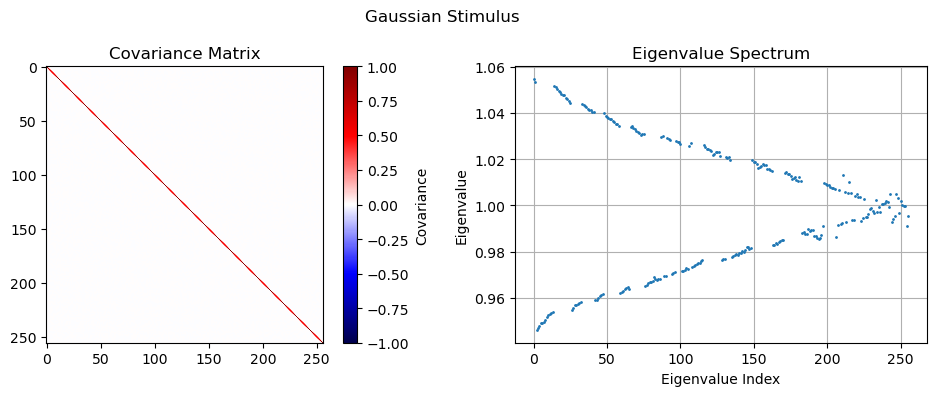

Max: 1.055
Min: 0.946


In [4]:
gauss_cov, gauss_eig = analyze_stimulus_covariance(gauss_stimulus, "Gaussian Stimulus")

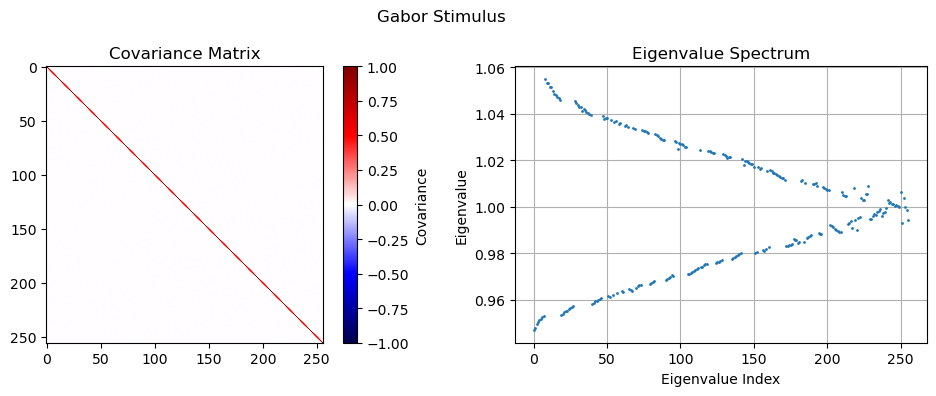

Max: 1.055
Min: 0.947


In [5]:
gabor_cov, gabor_eig = analyze_stimulus_covariance(gabor_stimulus, "Gabor Stimulus")

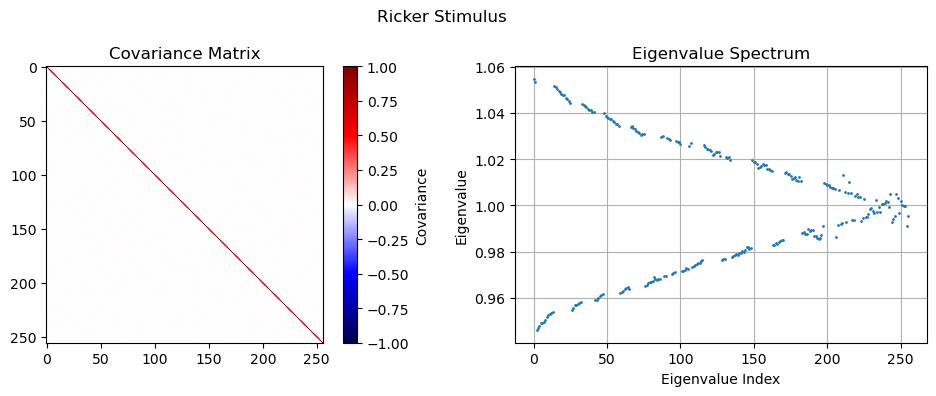

Max: 1.055
Min: 0.946


In [6]:
ricker_cov, ricker_eig = analyze_stimulus_covariance(ricker_stimulus, "Ricker Stimulus")